In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression

In [6]:
hr_data = pd.read_csv('data/hr.csv', header=0)
hr_data.head()
hr_data = hr_data.dropna()
print(hr_data.shape)
print(list(hr_data.columns))

(14999, 10)
['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary']


In [7]:
data_trnsf = pd.get_dummies(hr_data, columns =['salary', 'sales'])
data_trnsf.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'salary_high', 'salary_low', 'salary_medium',
       'sales_IT', 'sales_RandD', 'sales_accounting', 'sales_hr',
       'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical'],
      dtype='object')

In [8]:
X = data_trnsf.drop('left', axis=1)
X.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'salary_high', 'salary_low', 'salary_medium',
       'sales_IT', 'sales_RandD', 'sales_accounting', 'sales_hr',
       'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical'],
      dtype='object')

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, data_trnsf.left, test_size=0.3, random_state=42)
print(X_train)

       satisfaction_level  last_evaluation  number_project  \
12602                0.10             0.84               7   
4889                 0.57             0.68               4   
1572                 0.39             0.48               2   
13375                0.91             0.68               4   
879                  0.82             0.97               5   
1578                 0.10             0.96               6   
8765                 0.92             0.51               4   
1509                 0.44             0.52               2   
1896                 0.39             0.49               2   
4520                 0.70             0.44               2   
4112                 0.88             0.98               3   
11675                0.17             0.61               6   
1845                 0.43             0.56               2   
4914                 0.74             0.53               5   
14738                0.09             0.90               7   
9281    

In [10]:
attrition_classifier = LogisticRegression()
attrition_classifier.fit(X_train, Y_train)

Y_pred = attrition_classifier.predict(X_test)

In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)

print('Accuracy of logistic regression model on test dataset: {:.2f}'.format(attrition_classifier.score(X_test, Y_test)))

[[3175  253]
 [ 711  361]]
Accuracy of logistic regression model on test dataset: 0.79


In [19]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

             precision    recall  f1-score   support

          0       0.82      0.93      0.87      3428
          1       0.59      0.34      0.43      1072

avg / total       0.76      0.79      0.76      4500



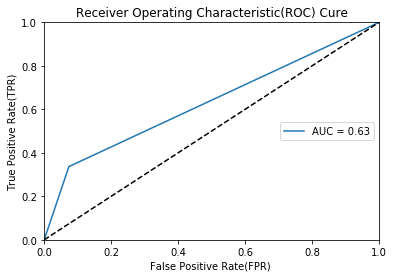

In [16]:

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Compute false positive rate(fpr), true positive rate(tpr), thresholds and roc auc(Area under Curve)
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
auc = auc(fpr,tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='AUC = %0.2f' % auc)
# random predictions curve
plt.plot([0, 1], [0, 1], 'k--')  
#Set the x limits
plt.xlim([0.0, 1.0])
#Set the Y limits
plt.ylim([0.0, 1.0])
#Set the X label
plt.xlabel('False Positive Rate(FPR) ')
#Set the Y label
plt.ylabel('True Positive Rate(TPR)')
#Set the plot title
plt.title('Receiver Operating Characteristic(ROC) Cure')
# Location of the AUC legend
plt.legend(loc="right")